## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale



In [2]:
# dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# about the train dataset
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
# about the test dataset
test_df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
train_df.shape

(42000, 785)

In [6]:
test_df.shape

(28000, 784)

In [7]:
# sample train dataset to compute only on 20% of the data
train_df = train_df[:8400]
train_df.shape

(8400, 785)

In [8]:
# sample test dataset to compute only on 20% of the data
test_df = test_df[:5600]
test_df.shape

(5600, 784)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.3 MB


In [10]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [11]:
# column-wise null count here
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
# column-wise null count here
test_df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [13]:
#Number of values
print(train_df['label'].value_counts())

1    926
2    883
7    871
3    843
6    839
9    839
0    833
4    815
8    795
5    756
Name: label, dtype: int64


In [14]:
#unique values in train data
print(list(np.sort(train_df['label'].unique())))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


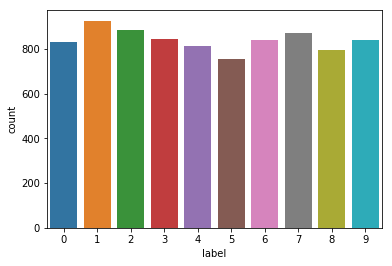

In [15]:
#Plot for label column
sns.countplot(train_df['label'])
plt.show()

## Data Preparation

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to **rescale** the features, since they may have varying ranges. For example, here are the average values:

In [16]:
# average feature values
round(train_df.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.03
pixel762    0.10
pixel763    0.14
pixel764    0.15
pixel765    0.10
pixel766    0.27
pixel767    0.48
pixel768    0.66
pixel769    0.59
pixel770    0.71
pixel771    0.52
pixel772    0.39
pixel773    0.26
pixel774    0.16
pixel775    0.12
pixel776    0.02
pixel777    0.00
pixel778    0.00
pixel779    0.00
pixel780    0.00
pixel781    0.

In [17]:
# splitting into X and y
X = train_df.drop("label", axis = 1)
y = train_df['label']

In [18]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 30)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [19]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [20]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.914285714286 

[[244   0   0   0   0   0   1   0   0   0]
 [  0 275   1   1   0   0   0   0   1   0]
 [  2   1 243   4   7   1   2   2   4   0]
 [  0   0  10 236   0   8   1   2   5   2]
 [  2   1   3   0 211   0   5   1   0  13]
 [  4   3   0  13   1 204   4   3   3   2]
 [  1   0   3   0   1   2 229   0   0   0]
 [  3   3   3   1   6   0   0 241   0  12]
 [  4   8   7   4   0   7   1   2 191   6]
 [  1   1   3   4   7   2   0  11   0 230]]


The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [21]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.925396825397 

[[242   0   2   0   0   0   0   0   1   0]
 [  0 272   1   1   0   0   1   2   1   0]
 [  2   2 245   3   5   0   1   6   2   0]
 [  0   0   9 234   0   4   1   5   7   4]
 [  0   1   5   0 217   0   1   5   0   7]
 [  1   1   2   4   1 210   6   7   4   1]
 [  1   0   4   0   1   1 224   5   0   0]
 [  2   3   2   1   3   0   0 249   0   9]
 [  0   2   4   2   0   8   1   4 205   4]
 [  0   0   4   6   6   0   0   7   2 234]]


The non-linear model gives approx. 93% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [23]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 30)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 69.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,70.320213,9.099699,0.726871,0.999787,1,0.01,"{'C': 1, 'gamma': 0.01}",12,0.718537,0.999787,...,0.755102,0.999787,0.708333,0.999787,0.717687,0.999787,3.206624,0.562613,0.016466,0.000000
1,20.552445,5.764219,0.922279,0.972917,1,0.001,"{'C': 1, 'gamma': 0.001}",4,0.925170,0.974065,...,0.926871,0.972789,0.916667,0.975978,0.920068,0.971939,0.896892,0.435196,0.003632,0.002064
2,30.115281,7.868171,0.890646,0.909099,1,0.0001,"{'C': 1, 'gamma': 0.0001}",8,0.888605,0.910714,...,0.903061,0.905187,0.883503,0.910714,0.895408,0.906463,1.023835,0.277022,0.007693,0.002774
3,73.694328,9.341705,0.747619,1.000000,10,0.01,"{'C': 10, 'gamma': 0.01}",9,0.738946,1.000000,...,0.773810,1.000000,0.727041,1.000000,0.742347,1.000000,0.797260,0.250164,0.016012,0.000000
4,17.416546,5.317035,0.937075,0.999490,10,0.001,"{'C': 10, 'gamma': 0.001}",3,0.941327,0.999362,...,0.942177,0.999575,0.936224,0.999787,0.931122,0.999575,0.277620,0.112561,0.004166,0.000217
5,13.535530,4.963576,0.920918,0.960332,10,0.0001,"{'C': 10, 'gamma': 0.0001}",6,0.920918,0.962798,...,0.934524,0.957270,0.906463,0.963010,0.929422,0.959396,0.807827,0.095913,0.010247,0.002228
6,74.565590,9.446519,0.747619,1.000000,100,0.01,"{'C': 100, 'gamma': 0.01}",9,0.738946,1.000000,...,0.773810,1.000000,0.727041,1.000000,0.742347,1.000000,0.624224,0.209413,0.016012,0.000000
7,17.471791,5.422272,0.937925,1.000000,100,0.001,"{'C': 100, 'gamma': 0.001}",1,0.940476,1.000000,...,0.941327,1.000000,0.938776,1.000000,0.931122,1.000000,0.126660,0.039638,0.003608,0.000000
8,10.709856,4.057400,0.921259,0.996386,100,0.0001,"{'C': 100, 'gamma': 0.0001}",5,0.918367,0.995961,...,0.934524,0.996386,0.908163,0.997662,0.925170,0.995961,0.260198,0.258925,0.008632,0.000659
9,73.888081,9.510463,0.747619,1.000000,1000,0.01,"{'C': 1000, 'gamma': 0.01}",9,0.738946,1.000000,...,0.773810,1.000000,0.727041,1.000000,0.742347,1.000000,0.887360,0.018608,0.016012,0.000000


In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9379251700680272 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [27]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.938095238095 

[[245   0   0   0   0   0   0   0   0   0]
 [  0 274   2   0   0   0   0   2   0   0]
 [  1   1 252   3   5   0   1   2   1   0]
 [  0   0   9 240   0   3   1   2   5   4]
 [  1   1   5   0 222   0   2   2   0   3]
 [  0   1   0   5   1 216   3   7   3   1]
 [  3   0   4   0   1   2 224   2   0   0]
 [  3   3   0   1   2   0   0 249   0  11]
 [  1   2   6   1   1   6   1   1 207   4]
 [  1   1   4   3   5   1   0   8   1 235]] 



## Conclusion

The accuracy achieved using a non-linear kernel (~0.94) is higher than that of a linear one (~0.91). We can conclude that the problem is non-linear in nature.